In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
size = 500

In [34]:
s = np.random.standard_normal(size)

In [35]:
scale = 2
y = np.round(np.power(s, 2)) * scale

In [36]:
x = np.tile(np.arange(24), round(size/(24-1)))
x = x[:size]
x.shape

(500,)

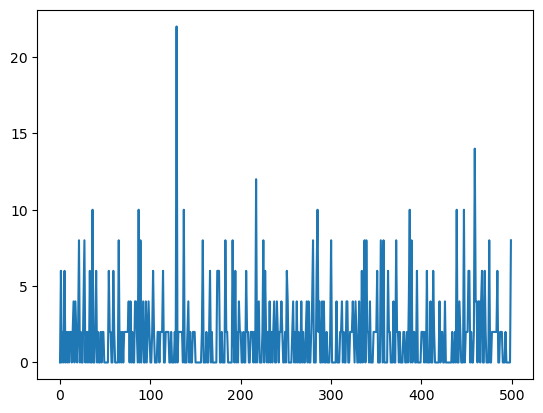

In [37]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(y)

In [38]:
z = np.round(np.sqrt(y)+1)
data = np.stack( (x,y, z), axis=-1)
df = pd.DataFrame(data, columns=["hour", "demand", "size"])

In [15]:
df

,hour,demand,size
0,0.0,2.0,2.0
1,1.0,0.0,1.0
2,2.0,2.0,2.0
3,3.0,0.0,1.0
4,4.0,0.0,1.0
...,...,...,...
495,15.0,4.0,3.0
496,16.0,0.0,1.0
497,17.0,0.0,1.0
498,18.0,2.0,2.0


In [40]:
X = df[["hour", "demand"]]
Y = df["size"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

In [43]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9733333333333334


In [47]:
ss = np.random.standard_normal(size)
yy = np.round(np.power(ss, 2)) * 2
xx = np.tile(np.arange(24), round(size/(24-1)))
xx = xx[:size]
xx.shape
zz = np.round(np.sqrt(yy)+1)
data_check = np.stack( (xx,yy, zz), axis=-1)
df_check = pd.DataFrame(data_check, columns=["hour", "demand", "size"])

yy_pred=clf.predict(df_check[["hour", "demand"]])
print("Accuracy:",metrics.accuracy_score(df_check["size"], yy_pred))

Accuracy: 0.974


In [48]:
pd.concat([df_check, pd.Series(yy_pred)], axis=1) 

,hour,demand,size,0
0,0.0,2.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,8.0,4.0,3.0
3,3.0,0.0,1.0,1.0
4,4.0,4.0,3.0,3.0
...,...,...,...,...
495,15.0,2.0,2.0,2.0
496,16.0,0.0,1.0,1.0
497,17.0,0.0,1.0,1.0
498,18.0,0.0,1.0,1.0


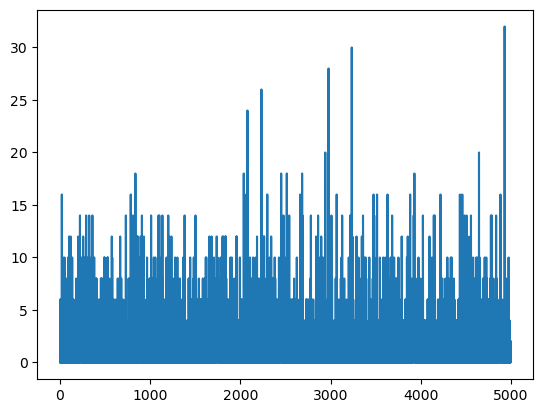

In [97]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(yy)